# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


##Tener todo en un csv para trabajar desde aqui

---



In [ ]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

# Importación de bibliotecas estándar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import gc

# Importación para visualización en Jupyter Notebook
from IPython.display import display

# Preprocesamiento y transformación de datos
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA

# Modelos de ensamble y machine learning
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Herramientas para clustering
from sklearn.cluster import KMeans

# División de datos y ajuste de modelos
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas de evaluación
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, confusion_matrix,
    classification_report, roc_curve, auc, precision_recall_curve
)

# Clonación de modelos
from sklearn.base import clone


Mounted at /content/drive


In [ ]:
#Unir DF con una iniciativa
ruta_archivo =  folder_path + 'bases/df_unido_limpioLGD_versionModelo.csv'
df_unidoLDG_encoded = pd.read_csv(ruta_archivo)

In [ ]:
# Ajustar la configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Mostrar las primeras filas del dataframe
display(df_unidoLDG_encoded.head())

,categoria_dominio_correo_Educativo,categoria_dominio_correo_Genérico,categoria_dominio_correo_Otros,base_SEXO_Femenino,base_SEXO_Masculino,base_Tipo Escuela_Arquitectura y Diseño,base_Tipo Escuela_Gobierno y Ciencias Sociales,base_Tipo Escuela_Humanidades y Educación,base_Tipo Escuela_Ingeniería y Ciencias,base_Tipo Escuela_Medicina y Ciencias de la salud,base_Tipo Escuela_Negocios,base_IDCAMPUS_,base_IDCAMPUS_1,base_IDCAMPUS_2,base_IDCAMPUS_8,base_IDCAMPUS_A,base_IDCAMPUS_A1,base_IDCAMPUS_AA,base_IDCAMPUS_C,base_IDCAMPUS_D,base_IDCAMPUS_E,base_IDCAMPUS_F,base_IDCAMPUS_G,base_IDCAMPUS_G1,base_IDCAMPUS_GA,base_IDCAMPUS_GQ,base_IDCAMPUS_GS,base_IDCAMPUS_H,base_IDCAMPUS_I,base_IDCAMPUS_J,base_IDCAMPUS_K,base_IDCAMPUS_L,base_IDCAMPUS_M,base_IDCAMPUS_N,base_IDCAMPUS_O,base_IDCAMPUS_P,base_IDCAMPUS_PUE,base_IDCAMPUS_Q,base_IDCAMPUS_R,base_IDCAMPUS_S,base_IDCAMPUS_T,base_IDCAMPUS_U,base_IDCAMPUS_W,base_IDCAMPUS_X,base_IDCAMPUS_Y,base_IDCAMPUS_Z,base_campusoperación_Aguascalientes,base_campusoperación_Chiapas,base_campusoperación_Chihuahua,base_campusoperación_Ciudad Juárez,base_campusoperación_Ciudad Obregón,base_campusoperación_Ciudad de México,base_campusoperación_Cuernavaca,base_campusoperación_EGADE,base_campusoperación_Escuela de Gobierno y Transformación Pública,base_campusoperación_Estado de México,base_campusoperación_Guadalajara,base_campusoperación_Guaymas,base_campusoperación_Hidalgo,base_campusoperación_Irapuato,base_campusoperación_Laguna,base_campusoperación_León,base_campusoperación_Mazatlán,base_campusoperación_Monterrey,base_campusoperación_Morelia,base_campusoperación_Programas en Línea,base_campusoperación_Puebla,base_campusoperación_Querétaro,base_campusoperación_Saltillo,base_campusoperación_San Luis Potosí,base_campusoperación_Santa Fe,base_campusoperación_Sede EGADE Monterrey,base_campusoperación_Sinaloa,base_campusoperación_Sonora Norte,base_campusoperación_Tampico,base_campusoperación_Toluca,base_campusoperación_Veracruz,base_campusoperación_Zacatecas,base_GIROEMPRESA_,base_GIROEMPRESA_Administración,base_GIROEMPRESA_Administración de Proyectos,base_GIROEMPRESA_Agrícola,base_GIROEMPRESA_Alimentos (Comercializador),base_GIROEMPRESA_Alimentos (Productos/Procesamiento),base_GIROEMPRESA_Artesanal,base_GIROEMPRESA_Aseguradora,base_GIROEMPRESA_Automotriz,base_GIROEMPRESA_Bienes Raíces,base_GIROEMPRESA_Boutiques,base_GIROEMPRESA_Comercializadora,base_GIROEMPRESA_Comunicación,base_GIROEMPRESA_Construcción,base_GIROEMPRESA_Consultoría,base_GIROEMPRESA_Contabilidad,base_GIROEMPRESA_Cómputo (Consultoría / Capacitación),base_GIROEMPRESA_Cómputo (Desarrollo de software),"base_GIROEMPRESA_Cómputo (Manufactura, Hardware)",base_GIROEMPRESA_De Servicios,base_GIROEMPRESA_Decoración,base_GIROEMPRESA_Dirección,base_GIROEMPRESA_Diseño Grafico,base_GIROEMPRESA_Editoriales,base_GIROEMPRESA_Educación,base_GIROEMPRESA_Entretenimiento,base_GIROEMPRESA_Estética / Productos de Belleza / Perfumería,base_GIROEMPRESA_Explotación de Recursos Naturales,base_GIROEMPRESA_Farmacéutica,base_GIROEMPRESA_Financiera,base_GIROEMPRESA_Finanzas,base_GIROEMPRESA_Ganadería / Caza,"base_GIROEMPRESA_Gobierno (Federal, Estatal y Municipal)",base_GIROEMPRESA_Hoteleria y turismo,base_GIROEMPRESA_Imprenta,base_GIROEMPRESA_Industrias Diversas,base_GIROEMPRESA_Información,base_GIROEMPRESA_Innovación,base_GIROEMPRESA_Investigación,base_GIROEMPRESA_Logística,base_GIROEMPRESA_Manufacturera/ Maquiladora,base_GIROEMPRESA_Medicina / Salud,base_GIROEMPRESA_Medios de Comunicación,base_GIROEMPRESA_Mercadotecnia,base_GIROEMPRESA_Metal Mecánico,base_GIROEMPRESA_Minería / Extracción,base_GIROEMPRESA_Mueblero,base_GIROEMPRESA_No aplica,base_GIROEMPRESA_Otro,base_GIROEMPRESA_Plástico / Hule,base_GIROEMPRESA_Producción y operaciones,base_GIROEMPRESA_Publicidad,base_GIROEMPRESA_Químico,base_GIROEMPRESA_Recursos humanos,base_GIROEMPRESA_Relaciones Públicas,base_GIROEMPRESA_Responsabilidad Social,base_GIROEMPRESA_Restaurante / Bar,base_GIROEMPRESA_Seguros,base_GIROEMPRESA_Servi

##Modelos Individuales Avance 4


In [39]:
# Lista de variables objetivo y sus configuraciones de hiperparámetros
variables_objetivo = {
    'es_LDGincubadora': {'alpha': 1.0, 'solver': 'auto', 'tol': 0.001},  # Hiperparámetros por defecto
    'es_Voluntariado': {'alpha': 10.0, 'solver': 'auto', 'tol': 0.0001},  # Hiperparámetros específicos
    'es_HistoriaExito': {'alpha': 0.1, 'solver': 'auto', 'tol': 0.0001}  # Hiperparámetros específicos
}

# DataFrame para almacenar todos los resultados
all_results = []

# Iterar sobre cada variable objetivo y su configuración de hiperparámetros
for objective_variable, hyperparams in variables_objetivo.items():

    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito'])
    y = df_unidoLDG_encoded[objective_variable]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Crear y entrenar el modelo RidgeClassifier con los hiperparámetros específicos
    model = RidgeClassifier(alpha=hyperparams['alpha'], solver=hyperparams['solver'], tol=hyperparams['tol'])
    model.fit(X_train, y_train)

    # Calcular el tiempo de entrenamiento
    training_time = time.time() - start_time

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar los resultados de forma individual para cada variable objetivo
    display(f"\nResultados para el modelo RidgeClassifier con variable objetivo '{objective_variable}':")
    display("Matriz de Confusión:")
    display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

    # Guardar los resultados en la lista general
    all_results.append({
        "Variable Objetivo": objective_variable,
        "Modelo": f"RidgeClassifier (alpha={hyperparams['alpha']}, solver='{hyperparams['solver']}', tol={hyperparams['tol']})",
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Tiempo de Entrenamiento (s)": training_time
    })

# Convertir los resultados a un DataFrame y mostrarlo
all_results_df = pd.DataFrame(all_results)
display("\nTabla Comparativa de Resultados RidgeClassifier:")
display(all_results_df)

"\nResultados para el modelo RidgeClassifier con variable objetivo 'es_LDGincubadora':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37761,962
Clase 1,794,27958


"\nResultados para el modelo RidgeClassifier con variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37341,1268
Clase 1,411,28455


"\nResultados para el modelo RidgeClassifier con variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37916,465
Clase 1,232,28862


'\nTabla Comparativa de Resultados RidgeClassifier:'

,Variable Objetivo,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_LDGincubadora,"RidgeClassifier (alpha=1.0, solver='auto', tol...",0.973976,0.973985,0.973976,4.412693
1,es_Voluntariado,"RidgeClassifier (alpha=10.0, solver='auto', to...",0.975117,0.975159,0.975117,2.799683
2,es_HistoriaExito,"RidgeClassifier (alpha=0.1, solver='auto', tol...",0.989670,0.989675,0.989670,3.066006


#**Avance 5. Modelo final**

##Modelos de Ensamble Homogéneos


####Bagging con RidgeClassifier
Mediante BaggingClassifier de sklearn.ensemble

In [ ]:
# Configuración de parámetros
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']  # Variables objetivo
n_estimators = 10  # Número de modelos en el ensamble

# Lista para almacenar los resultados de cada variable objetivo
all_results = []

# Iterar sobre cada variable objetivo
for objective_variable in objective_variables:

    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=objective_variables)
    y = df_unidoLDG_encoded[objective_variable]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Crear y entrenar el modelo de ensamble Bagging con RidgeClassifier
    base_model = RidgeClassifier()  # Modelo base
    bagging_model = BaggingClassifier(estimator=base_model, n_estimators=n_estimators, random_state=42)
    bagging_model.fit(X_train, y_train)

    # Calcular el tiempo de entrenamiento
    training_time = time.time() - start_time

    # Predicciones en el conjunto de prueba
    y_pred = bagging_model.predict(X_test)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar los resultados individuales
    display(f"\nResultados para el modelo Bagging con RidgeClassifier para la variable objetivo '{objective_variable}':")
    display("Matriz de Confusión:")
    display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

    # Guardar los resultados en un diccionario
    results_bagging = {
        "Variable Objetivo": objective_variable,
        "Modelo": f"Bagging con RidgeClassifier (n_estimators={n_estimators})",
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Tiempo de Entrenamiento (s)": training_time
    }

    # Añadir los resultados a la lista general
    all_results.append(results_bagging)

# Convertir los resultados a un DataFrame y mostrar la tabla comparativa
results_bagging_df = pd.DataFrame(all_results)
display("\nTabla Comparativa de Resultados del Modelo Bagging con RidgeClassifier para todas las Variables Objetivo:")
display(results_bagging_df)

"\nResultados para el modelo Bagging con RidgeClassifier para la variable objetivo 'es_LDGincubadora':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37767,956
Clase 1,797,27955


"\nResultados para el modelo Bagging con RidgeClassifier para la variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37357,1252
Clase 1,417,28449


"\nResultados para el modelo Bagging con RidgeClassifier para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37918,463
Clase 1,232,28862


'\nTabla Comparativa de Resultados del Modelo Bagging con RidgeClassifier para todas las Variables Objetivo:'

,Variable Objetivo,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_LDGincubadora,Bagging con RidgeClassifier (n_estimators=10),0.974020,0.974029,0.974020,27.957535
1,es_Voluntariado,Bagging con RidgeClassifier (n_estimators=10),0.975265,0.975306,0.975265,27.078585
2,es_HistoriaExito,Bagging con RidgeClassifier (n_estimators=10),0.989700,0.989705,0.989700,27.107987


####Boosting con RidgeClassifier

In [ ]:
# Configuración de parámetros
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']  # Variables objetivo
n_estimators = 50  # Número de modelos en el ensamble
learning_rate = 0.1  # Tasa de aprendizaje

# Lista para almacenar los resultados de cada variable objetivo
all_results = []

# Iterar sobre cada variable objetivo
for objective_variable in objective_variables:

    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=objective_variables)
    y = df_unidoLDG_encoded[objective_variable]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Medir el tiempo de entrenamiento
    start_time = time.time()

    # Crear y entrenar el modelo de ensamble Boosting con AdaBoost y RidgeClassifier como modelo base
    base_model = RidgeClassifier()  # Modelo base
    boosting_model = AdaBoostClassifier(estimator=base_model, n_estimators=n_estimators, learning_rate=learning_rate, algorithm='SAMME', random_state=42)
    boosting_model.fit(X_train, y_train)

    # Calcular el tiempo de entrenamiento
    training_time = time.time() - start_time

    # Predicciones en el conjunto de prueba
    y_pred = boosting_model.predict(X_test)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar los resultados individuales
    display(f"\nResultados para el modelo AdaBoost con RidgeClassifier para la variable objetivo '{objective_variable}':")
    display("Matriz de Confusión:")
    display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

    # Guardar los resultados en un diccionario
    results_boosting = {
        "Variable Objetivo": objective_variable,
        "Modelo": f"AdaBoost con RidgeClassifier (n_estimators={n_estimators}, learning_rate={learning_rate}, algorithm='SAMME')",
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Tiempo de Entrenamiento (s)": training_time
    }

    # Añadir los resultados a la lista general
    all_results.append(results_boosting)

# Convertir los resultados a un DataFrame y mostrar la tabla comparativa
results_boosting_df = pd.DataFrame(all_results)
display("\nTabla Comparativa de Resultados del Modelo AdaBoost con RidgeClassifier para todas las Variables Objetivo:")
display(results_boosting_df)

"\nResultados para el modelo AdaBoost con RidgeClassifier para la variable objetivo 'es_LDGincubadora':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37151,1572
Clase 1,1832,26920


"\nResultados para el modelo AdaBoost con RidgeClassifier para la variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,36903,1706
Clase 1,1719,27147


"\nResultados para el modelo AdaBoost con RidgeClassifier para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,38153,228
Clase 1,167,28927


'\nTabla Comparativa de Resultados del Modelo AdaBoost con RidgeClassifier para todas las Variables Objetivo:'

,Variable Objetivo,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_LDGincubadora,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.949552,0.949522,0.949552,143.052599
1,es_Voluntariado,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.949240,0.949239,0.949240,148.012858
2,es_HistoriaExito,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.994146,0.994147,0.994146,151.395576


##Modelos de Ensamble Heterogéneos

####Modelo de ensamble heterogéneo utilizando Stacking


 El código combina RidgeClassifier como modelo base y usa LogisticRegression como el meta-modelo:

In [17]:
# Configuración de las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']  # Variables objetivo

# Lista para almacenar los resultados de cada variable objetivo
all_results = []

# Iterar sobre cada variable objetivo
for objective_variable in objective_variables:

    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=objective_variables)
    y = df_unidoLDG_encoded[objective_variable]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definir los modelos base y el meta-modelo para el Stacking
    base_models = [
        ('ridge', RidgeClassifier()),
        ('lda', LinearDiscriminantAnalysis())  # LDA como modelo base adicional
    ]
    meta_model = LogisticRegression()

    # Crear el modelo de ensamble Stacking
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

    # Medir el tiempo de entrenamiento
    start_time = time.time()
    stacking_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predicciones en el conjunto de prueba
    y_pred = stacking_model.predict(X_test)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar los resultados individuales
    display(f"\nResultados para el modelo Stacking con RidgeClassifier, KNN, y LDA como modelos base y LogisticRegression como meta-modelo para la variable objetivo '{objective_variable}':")
    display("Matriz de Confusión:")
    display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

    # Guardar los resultados en un diccionario
    results_stacking = {
        "Variable Objetivo": objective_variable,
        "Modelo": "Stacking con RidgeClassifier, KNN, y LDA (base) y LogisticRegression (meta-modelo)",
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Tiempo de Entrenamiento (s)": training_time
    }

    # Añadir los resultados a la lista general
    all_results.append(results_stacking)

# Convertir los resultados a un DataFrame y mostrar la tabla comparativa
results_stacking_df = pd.DataFrame(all_results)
display("\nTabla Comparativa de Resultados del Modelo Stacking para todas las Variables Objetivo:")
display(results_stacking_df)

"\nResultados para el modelo Stacking con RidgeClassifier, KNN, y LDA como modelos base y LogisticRegression como meta-modelo para la variable objetivo 'es_LDGincubadora':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37773,950
Clase 1,803,27949


"\nResultados para el modelo Stacking con RidgeClassifier, KNN, y LDA como modelos base y LogisticRegression como meta-modelo para la variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37639,970
Clase 1,456,28410


"\nResultados para el modelo Stacking con RidgeClassifier, KNN, y LDA como modelos base y LogisticRegression como meta-modelo para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,38052,329
Clase 1,350,28744


'\nTabla Comparativa de Resultados del Modelo Stacking para todas las Variables Objetivo:'

,Variable Objetivo,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_LDGincubadora,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.974020,0.974028,0.974020,170.000750
1,es_Voluntariado,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.978866,0.978889,0.978866,167.694031
2,es_HistoriaExito,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.989937,0.989937,0.989937,163.097996


####Modelo de ensamble heterogéneo utilizando Blending

In [36]:
# Configuración de las variables objetivo
objective_variables = ['es_LDGincubadora', 'es_Voluntariado', 'es_HistoriaExito']  # Variables objetivo

# Lista para almacenar los resultados de cada variable objetivo
all_results = []

# Iterar sobre cada variable objetivo
for objective_variable in objective_variables:

    # Separar las variables predictoras (X) y la variable objetivo (y)
    X = df_unidoLDG_encoded.drop(columns=objective_variables)
    y = df_unidoLDG_encoded[objective_variable]

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Dividir el conjunto de entrenamiento en dos partes: una para entrenar los modelos base y otra para generar predicciones
    X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # Definir los modelos base
    base_models = [
        ('ridge', RidgeClassifier())
    ]

    # Crear un array para almacenar las predicciones de los modelos base sobre la partición de validación
    valid_preds = np.zeros((X_valid_base.shape[0], len(base_models)))

    # Medir el tiempo de entrenamiento
    start_time = time.time()  # Definir start_time antes del entrenamiento

    # Entrenar cada modelo base en la partición de entrenamiento y generar predicciones sobre la partición de validación
    for i, (name, model) in enumerate(base_models):
        cloned_model = clone(model)
        cloned_model.fit(X_train_base, y_train_base)
        valid_preds[:, i] = cloned_model.predict(X_valid_base)

    # Entrenar el meta-modelo en las predicciones de la partición de validación
    meta_model = LogisticRegression()
    meta_model.fit(valid_preds, y_valid_base)

    # Calcular el tiempo de entrenamiento
    training_time = time.time() - start_time

    # Generar predicciones del conjunto de prueba con el ensamble de Blending
    # Primero, obtenemos las predicciones de los modelos base en X_test y luego alimentamos esas predicciones al meta-modelo
    test_preds = np.zeros((X_test.shape[0], len(base_models)))
    for i, (name, model) in enumerate(base_models):
        cloned_model = clone(model)
        cloned_model.fit(X_train_base, y_train_base)  # Reentrenar cada modelo base en toda la partición de entrenamiento
        test_preds[:, i] = cloned_model.predict(X_test)

    # Obtener las predicciones finales del meta-modelo
    y_pred = meta_model.predict(test_preds)

    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar los resultados individuales
    display(f"\nResultados para el modelo de Blending con RidgeClassifier como modelo base y LogisticRegression como meta-modelo para la variable objetivo '{objective_variable}':")
    display("Matriz de Confusión:")
    display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

    # Guardar los resultados en un diccionario
    results_blending = {
        "Variable Objetivo": objective_variable,
        "Modelo": "Blending con RidgeClassifier (base) y LogisticRegression (meta-modelo)",
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Recall": recall,
        "Tiempo de Entrenamiento (s)": training_time
    }

    # Añadir los resultados a la lista general
    all_results.append(results_blending)

# Convertir los resultados a un DataFrame y mostrar la tabla comparativa
results_blending_df = pd.DataFrame(all_results)
display("\nTabla Comparativa de Resultados del Modelo Blending para todas las Variables Objetivo:")
display(results_blending_df)

"\nResultados para el modelo de Blending con RidgeClassifier como modelo base y LogisticRegression como meta-modelo para la variable objetivo 'es_LDGincubadora':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37796,927
Clase 1,763,27989


"\nResultados para el modelo de Blending con RidgeClassifier como modelo base y LogisticRegression como meta-modelo para la variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37327,1282
Clase 1,404,28462


"\nResultados para el modelo de Blending con RidgeClassifier como modelo base y LogisticRegression como meta-modelo para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37917,464
Clase 1,69,29025


'\nTabla Comparativa de Resultados del Modelo Blending para todas las Variables Objetivo:'

,Variable Objetivo,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_LDGincubadora,Blending con RidgeClassifier (base) y Logistic...,0.974954,0.974963,0.974954,2.249107
1,es_Voluntariado,Blending con RidgeClassifier (base) y Logistic...,0.975013,0.975056,0.975013,2.632383
2,es_HistoriaExito,Blending con RidgeClassifier (base) y Logistic...,0.992101,0.992107,0.992101,1.869913


##Comparativa de Modelos de Ensamble

In [19]:
# Concatenar los resultados en un solo DataFrame para crear una tabla comparativa general
comparative_results_df = pd.concat([results_bagging_df, results_boosting_df, results_stacking_df, results_blending_df], ignore_index=True)

# Crear listas para almacenar las tablas filtradas y ordenadas por cada variable objetivo
history_success_df = comparative_results_df[comparative_results_df['Variable Objetivo'] == 'es_HistoriaExito'].sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
volunteering_df = comparative_results_df[comparative_results_df['Variable Objetivo'] == 'es_Voluntariado'].sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
incubator_df = comparative_results_df[comparative_results_df['Variable Objetivo'] == 'es_LDGincubadora'].sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Mostrar la tabla comparativa para "es_HistoriaExito"
display("\nTabla Comparativa de Resultados para la Variable Objetivo 'es_HistoriaExito' (ordenada por Accuracy):")
display(history_success_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall', 'Tiempo de Entrenamiento (s)']])

# Mostrar la tabla comparativa para "es_Voluntariado"
display("\nTabla Comparativa de Resultados para la Variable Objetivo 'es_Voluntariado' (ordenada por Accuracy):")
display(volunteering_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall', 'Tiempo de Entrenamiento (s)']])

# Mostrar la tabla comparativa para "es_LDGincubadora"
display("\nTabla Comparativa de Resultados para la Variable Objetivo 'es_LDGincubadora' (ordenada por Accuracy):")
display(incubator_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall', 'Tiempo de Entrenamiento (s)']])

"\nTabla Comparativa de Resultados para la Variable Objetivo 'es_HistoriaExito' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.994146,0.994147,0.994146,151.395576
1,Blending con RidgeClassifier (base) y Logistic...,0.992101,0.992107,0.992101,1.822245
2,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.989937,0.989937,0.989937,163.097996
3,Bagging con RidgeClassifier (n_estimators=10),0.989700,0.989705,0.989700,27.107987


"\nTabla Comparativa de Resultados para la Variable Objetivo 'es_Voluntariado' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.978866,0.978889,0.978866,167.694031
1,Bagging con RidgeClassifier (n_estimators=10),0.975265,0.975306,0.975265,27.078585
2,Blending con RidgeClassifier (base) y Logistic...,0.975013,0.975056,0.975013,2.113238
3,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.949240,0.949239,0.949240,148.012858


"\nTabla Comparativa de Resultados para la Variable Objetivo 'es_LDGincubadora' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,Blending con RidgeClassifier (base) y Logistic...,0.974954,0.974963,0.974954,2.434439
1,Bagging con RidgeClassifier (n_estimators=10),0.974020,0.974029,0.974020,27.957535
2,"Stacking con RidgeClassifier, KNN, y LDA (base...",0.974020,0.974028,0.974020,170.000750
3,"AdaBoost con RidgeClassifier (n_estimators=50,...",0.949552,0.949522,0.949552,143.052599


###Selección de los Mejores Modelos por Variable Objetivo

**Mejor modelo para es_HistoriaExito**

* Basándonos en los resultados obtenidos para la variable objetivo es_HistoriaExito, seleccionaremos **Blending con RidgeClassifier** como el modelo preferido. Aunque este modelo obtuvo el segundo mejor desempeño, presenta un tiempo de entrenamiento significativamente menor en comparación con AdaBoost con RidgeClassifier, que ocupa el primer lugar en precisión por un margen reducido.

**Mejor modelo para es_Voluntariado**

* Para la variable objetivo es_Voluntariado, aplicaremos **Bagging con RidgeClassifier**. Este modelo también obtuvo el segundo mejor rendimiento en términos de precisión, pero su tiempo de entrenamiento es considerablemente más bajo que el de Stacking con RidgeClassifier, que ocupa el primer lugar en rendimiento.

**Mejor modelo para es_LDGincubadora**

* Finalmente, para la variable objetivo es_LDGincubadora, seleccionaremos **Blending con RidgeClassifier**. Este modelo alcanzó tanto los mejores resultados en precisión como en eficiencia de tiempo, consolidándose como la opción óptima para esta variable.

##Optimización de Hiperparámetros para los mejores Modelos de Ensamble

Seleccionamos los modelos de ensamble que mostraron mejor rendimiento en las pruebas iniciales

###Ajuste fino Blending con *RidgeClassifier* para es_HistoriaExito

In [24]:
# Variable objetivo específica
objective_variable = 'es_HistoriaExito'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoLDG_encoded.drop(columns=objective_variables)
y = df_unidoLDG_encoded[objective_variable]

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en dos partes: una para entrenar los modelos base y otra para generar predicciones
X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Definir los modelos base y los hiperparámetros para el ajuste fino
base_model = RidgeClassifier()
param_grid_base = {
    'alpha': [0.1, 1.0, 10.0],
    'tol': [0.001, 0.0001],
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros para RidgeClassifier
grid_search_base = GridSearchCV(base_model, param_grid_base, cv=5)
grid_search_base.fit(X_train_base, y_train_base)
best_base_model = grid_search_base.best_estimator_

# Entrenar el mejor modelo base y generar predicciones en la partición de validación
valid_preds = best_base_model.predict(X_valid_base).reshape(-1, 1)

# Definir el meta-modelo y los hiperparámetros para el ajuste fino
meta_model = LogisticRegression()
param_grid_meta = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros para LogisticRegression
grid_search_meta = GridSearchCV(meta_model, param_grid_meta, cv=5)
grid_search_meta.fit(valid_preds, y_valid_base)
best_meta_model = grid_search_meta.best_estimator_

# Medir el tiempo de entrenamiento total
start_time = time.time()

# Generar predicciones en el conjunto de prueba con el modelo de Blending
test_preds = best_base_model.predict(X_test).reshape(-1, 1)
y_pred = best_meta_model.predict(test_preds)

# Calcular el tiempo de entrenamiento total
training_time = time.time() - start_time

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados individuales
display(f"\nResultados para el modelo de Blending ajustado para la variable objetivo '{objective_variable}':")
display("Matriz de Confusión:")
display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

# Guardar los resultados en un diccionario
results_blending = {
    "Variable Objetivo": objective_variable,
    "Modelo": "Blending ajustado con RidgeClassifier (base) y LogisticRegression (meta-modelo)",
    "Mejores Hiperparámetros Base": grid_search_base.best_params_,
    "Mejores Hiperparámetros Meta": grid_search_meta.best_params_,
    "Accuracy": accuracy,
    "F1-Score": f1,
    "Recall": recall,
    "Tiempo de Entrenamiento (s)": training_time
}

# Convertir los resultados a un DataFrame y mostrarlo
results_blending_HE_ajustado_df = pd.DataFrame([results_blending])
display("\nTabla de Resultados del Modelo Blending Ajustado para 'es_HistoriaExito':")
display(results_blending_HE_ajustado_df)

"\nResultados para el modelo de Blending ajustado para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37917,464
Clase 1,69,29025


"\nTabla de Resultados del Modelo Blending Ajustado para 'es_HistoriaExito':"

,Variable Objetivo,Modelo,Mejores Hiperparámetros Base,Mejores Hiperparámetros Meta,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_HistoriaExito,Blending ajustado con RidgeClassifier (base) y...,"{'alpha': 1.0, 'tol': 0.001}","{'C': 0.01, 'solver': 'lbfgs'}",0.992101,0.992107,0.992101,0.241585


###Ajuste fino Bagging con *RidgeClassifier* para  para es_Voluntariado

In [25]:
# Variable objetivo específica
objective_variable = 'es_Voluntariado'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoLDG_encoded.drop(columns=objective_variables)
y = df_unidoLDG_encoded[objective_variable]

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base y los parámetros para el ajuste fino
base_model = RidgeClassifier()
param_grid = {
    'estimator__alpha': [0.1, 1.0, 10.0],  # Ajuste de hiperparámetros del modelo base (RidgeClassifier)
    'n_estimators': [5, 10, 20]            # Ajuste del número de estimadores en Bagging
}

# Crear el modelo Bagging con RidgeClassifier
bagging_model = BaggingClassifier(estimator=base_model, random_state=42)

# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(bagging_model, param_grid, cv=5)
start_time = time.time()  # Iniciar medición de tiempo
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time  # Calcular el tiempo de entrenamiento

# Obtener el mejor modelo después del ajuste fino
best_bagging_model = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = best_bagging_model.predict(X_test)

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados individuales
display(f"\nResultados para el modelo Bagging ajustado con RidgeClassifier para la variable objetivo '{objective_variable}':")
display("Matriz de Confusión:")
display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

# Guardar los resultados en un diccionario
results_bagging = {
    "Variable Objetivo": objective_variable,
    "Modelo": "Bagging ajustado con RidgeClassifier",
    "Mejores Hiperparámetros": grid_search.best_params_,
    "Accuracy": accuracy,
    "F1-Score": f1,
    "Recall": recall,
    "Tiempo de Entrenamiento (s)": training_time
}

# Convertir los resultados a un DataFrame y mostrarlo
results_bagging_ajustado_df = pd.DataFrame([results_bagging])
display("\nTabla de Resultados del Modelo Bagging Ajustado para 'es_Voluntariado':")
display(results_bagging_ajustado_df)

"\nResultados para el modelo Bagging ajustado con RidgeClassifier para la variable objetivo 'es_Voluntariado':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37379,1230
Clase 1,417,28449


"\nTabla de Resultados del Modelo Bagging Ajustado para 'es_Voluntariado':"

,Variable Objetivo,Modelo,Mejores Hiperparámetros,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_Voluntariado,Bagging ajustado con RidgeClassifier,"{'estimator__alpha': 10.0, 'n_estimators': 10}",0.975591,0.975631,0.975591,1379.604335


###Ajuste fino Blending con *RidgeClassifier* para es_LDGincubadora

In [26]:
# Variable objetivo específica
objective_variable = 'es_HistoriaExito'

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_unidoLDG_encoded.drop(columns=objective_variables)
y = df_unidoLDG_encoded[objective_variable]

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en dos partes: una para entrenar los modelos base y otra para generar predicciones
X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Definir los modelos base y los hiperparámetros para el ajuste fino
base_model = RidgeClassifier()
param_grid_base = {
    'alpha': [0.1, 1.0, 10.0],
    'tol': [0.001, 0.0001],
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros para RidgeClassifier
grid_search_base = GridSearchCV(base_model, param_grid_base, cv=5)
grid_search_base.fit(X_train_base, y_train_base)
best_base_model = grid_search_base.best_estimator_

# Entrenar el mejor modelo base y generar predicciones en la partición de validación
valid_preds = best_base_model.predict(X_valid_base).reshape(-1, 1)

# Definir el meta-modelo y los hiperparámetros para el ajuste fino
meta_model = LogisticRegression()
param_grid_meta = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Usar GridSearchCV para encontrar los mejores hiperparámetros para LogisticRegression
grid_search_meta = GridSearchCV(meta_model, param_grid_meta, cv=5)
grid_search_meta.fit(valid_preds, y_valid_base)
best_meta_model = grid_search_meta.best_estimator_

# Medir el tiempo de entrenamiento total
start_time = time.time()

# Generar predicciones en el conjunto de prueba con el modelo de Blending
test_preds = best_base_model.predict(X_test).reshape(-1, 1)
y_pred = best_meta_model.predict(test_preds)

# Calcular el tiempo de entrenamiento total
training_time = time.time() - start_time

# Evaluar el rendimiento
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados individuales
display(f"\nResultados para el modelo de Blending ajustado para la variable objetivo '{objective_variable}':")
display("Matriz de Confusión:")
display(pd.DataFrame(conf_matrix, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1']))

# Guardar los resultados en un diccionario
results_blending = {
    "Variable Objetivo": objective_variable,
    "Modelo": "Blending ajustado con RidgeClassifier (base) y LogisticRegression (meta-modelo)",
    "Mejores Hiperparámetros Base": grid_search_base.best_params_,
    "Mejores Hiperparámetros Meta": grid_search_meta.best_params_,
    "Accuracy": accuracy,
    "F1-Score": f1,
    "Recall": recall,
    "Tiempo de Entrenamiento (s)": training_time
}

# Convertir los resultados a un DataFrame y mostrarlo
results_blending_VOL_ajustado_df = pd.DataFrame([results_blending])
display("\nTabla de Resultados del Modelo Blending Ajustado para 'es_HistoriaExito':")
display(results_blending_VOL_ajustado_df)

"\nResultados para el modelo de Blending ajustado para la variable objetivo 'es_HistoriaExito':"

'Matriz de Confusión:'

,Predicción 0,Predicción 1
Clase 0,37917,464
Clase 1,69,29025


"\nTabla de Resultados del Modelo Blending Ajustado para 'es_HistoriaExito':"

,Variable Objetivo,Modelo,Mejores Hiperparámetros Base,Mejores Hiperparámetros Meta,Accuracy,F1-Score,Recall,Tiempo de Entrenamiento (s)
0,es_HistoriaExito,Blending ajustado con RidgeClassifier (base) y...,"{'alpha': 1.0, 'tol': 0.001}","{'C': 0.01, 'solver': 'lbfgs'}",0.992101,0.992107,0.992101,0.155988


##Comparacion de mejores modelos antes y despues del ajuste fino por variable objetivo

In [47]:
# Crear comparaciones sin modificar el DataFrame original `results_blending_df`

# Para es_HistoriaExito
blending_HE_before_df = results_blending_df[results_blending_df['Variable Objetivo'] == 'es_HistoriaExito'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
blending_HE_after_df = results_blending_HE_ajustado_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall']]

# Concatenar, ordenar y mostrar los resultados para es_HistoriaExito
comparison_HE_df = pd.concat([blending_HE_before_df, blending_HE_after_df], keys=['Antes del Ajuste Fino', 'Después del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nTabla Comparativa de Resultados para 'es_HistoriaExito' (ordenada por Accuracy):")
display(comparison_HE_df)

# Para es_Voluntariado
bagging_VOL_before_df = results_bagging_df[results_bagging_df['Variable Objetivo'] == 'es_Voluntariado'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
bagging_VOL_after_df = results_bagging_ajustado_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall']]

# Concatenar, ordenar y mostrar los resultados para es_Voluntariado
comparison_VOL_df = pd.concat([bagging_VOL_before_df, bagging_VOL_after_df], keys=['Antes del Ajuste Fino', 'Después del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nTabla Comparativa de Resultados para 'es_Voluntariado' (ordenada por Accuracy):")
display(comparison_VOL_df)

# Para es_LDGincubadora
blending_LDG_before_df = results_blending_df[results_blending_df['Variable Objetivo'] == 'es_LDGincubadora'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
blending_LDG_after_df = results_blending_VOL_ajustado_df[['Modelo', 'Accuracy', 'F1-Score', 'Recall']]

# Concatenar, ordenar y mostrar los resultados para es_LDGincubadora
comparison_LDG_df = pd.concat([blending_LDG_before_df, blending_LDG_after_df], keys=['Antes del Ajuste Fino', 'Después del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nTabla Comparativa de Resultados para 'es_LDGincubadora' (ordenada por Accuracy):")
display(comparison_LDG_df)

"\nTabla Comparativa de Resultados para 'es_HistoriaExito' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Blending con RidgeClassifier (base) y Logistic...,0.992101,0.992107,0.992101
1,Blending ajustado con RidgeClassifier (base) y...,0.992101,0.992107,0.992101


"\nTabla Comparativa de Resultados para 'es_Voluntariado' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Bagging ajustado con RidgeClassifier,0.975591,0.975631,0.975591
1,Bagging con RidgeClassifier (n_estimators=10),0.975265,0.975306,0.975265


"\nTabla Comparativa de Resultados para 'es_LDGincubadora' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Blending ajustado con RidgeClassifier (base) y...,0.992101,0.992107,0.992101
1,Blending con RidgeClassifier (base) y Logistic...,0.974954,0.974963,0.974954


Solo para es_Voluntariado, obtuvimos mejores resultados despues del ajuste fino, por lo que para la comparacion final este es el que tomaremos en cuenta

##Comparacion Modelo Finale del Avance 4 vs Modelo Final del Avance 5 para cada vairable objetivo

In [54]:
# Filtrar y ordenar los resultados del avance 4 y Blending para 'es_HistoriaExito'
history_exito_best_df = all_results_df[all_results_df['Variable Objetivo'] == 'es_HistoriaExito'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
comparison_HE_df = pd.concat([history_exito_best_df, blending_HE_before_df], keys=['Avance 4 (Mejor Modelo)', 'Blending Antes del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nComparación de Resultados para la variable objetivo 'es_HistoriaExito' (ordenada por Accuracy):")
display(comparison_HE_df)

# Filtrar y ordenar los resultados del avance 4 y Bagging para 'es_Voluntariado'
voluntariado_best_df = all_results_df[all_results_df['Variable Objetivo'] == 'es_Voluntariado'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
comparison_VOL_df = pd.concat([voluntariado_best_df, bagging_VOL_after_df], keys=['Avance 4 (Mejor Modelo)', 'Bagging Después del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nComparación de Resultados para la variable objetivo 'es_Voluntariado' (ordenada por Accuracy):")
display(comparison_VOL_df)

# Filtrar y ordenar los resultados del avance 4 y Blending para 'es_LDGincubadora'
ldg_incubadora_best_df = all_results_df[all_results_df['Variable Objetivo'] == 'es_LDGincubadora'][['Modelo', 'Accuracy', 'F1-Score', 'Recall']].reset_index(drop=True)
comparison_LDG_df = pd.concat([ldg_incubadora_best_df, blending_LDG_after_df], keys=['Avance 4 (Mejor Modelo)', 'Blending Después del Ajuste Fino']).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
display("\nComparación de Resultados para la variable objetivo 'es_LDGincubadora' (ordenada por Accuracy):")
display(comparison_LDG_df)

"\nComparación de Resultados para la variable objetivo 'es_HistoriaExito' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Blending con RidgeClassifier (base) y Logistic...,0.992101,0.992107,0.992101
1,"RidgeClassifier (alpha=0.1, solver='auto', tol...",0.989670,0.989675,0.989670


"\nComparación de Resultados para la variable objetivo 'es_Voluntariado' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Bagging ajustado con RidgeClassifier,0.975591,0.975631,0.975591
1,"RidgeClassifier (alpha=10.0, solver='auto', to...",0.975117,0.975159,0.975117


"\nComparación de Resultados para la variable objetivo 'es_LDGincubadora' (ordenada por Accuracy):"

,Modelo,Accuracy,F1-Score,Recall
0,Blending ajustado con RidgeClassifier (base) y...,0.992101,0.992107,0.992101
1,"RidgeClassifier (alpha=1.0, solver='auto', tol...",0.973976,0.973985,0.973976


Con la tabla anterior podemos analizar que el mejor modelo para cada variable objetivo es:

* **es_HistoriaExito:** Blending con RidgeClassifier antes del ajuste fino.

* **es_Voluntariado:** Bagging con RidgeClassifier después del Ajuste Fino, con los siguientes hiperparametros : 'estimator__alpha': 10.0, 'n_estimators': 10

* **es_LDGincubadora:** Blending con RidgeClassifier después del ajuste fino, con los siguientes hiperparametros "alpha': 1.0, 'tol': 0.001"



##Análisis Visual y Generación de Gráficos

Para cada variable objetivo, utilizamos los siguientes gráficos:

*  **Matriz de Confusión:** Para ver el rendimiento por clase y los errores de clasificación.

* **Curva ROC y AUC:** Para evaluar la capacidad de discriminación del modelo.

* **Curva de Precisión-Recall:** Para observar el balance entre precisión y recall, útil en casos de clases desbalanceadas.


Resultados para la variable objetivo 'es_HistoriaExito' usando Blending con RidgeClassifier:


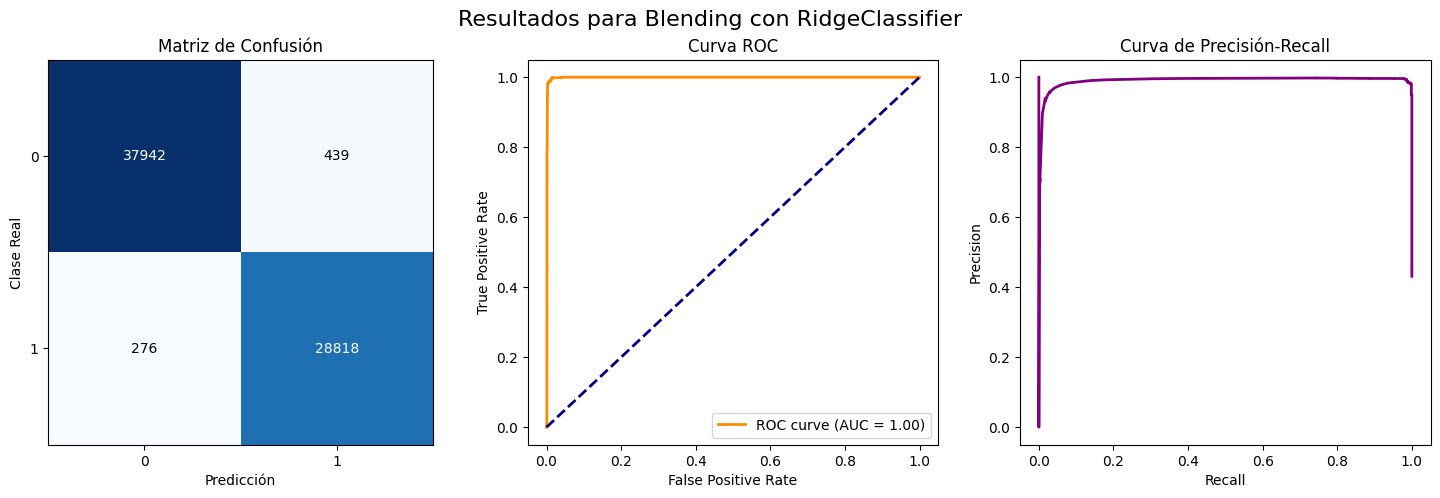


Resultados para la variable objetivo 'es_Voluntariado' usando Bagging con RidgeClassifier:


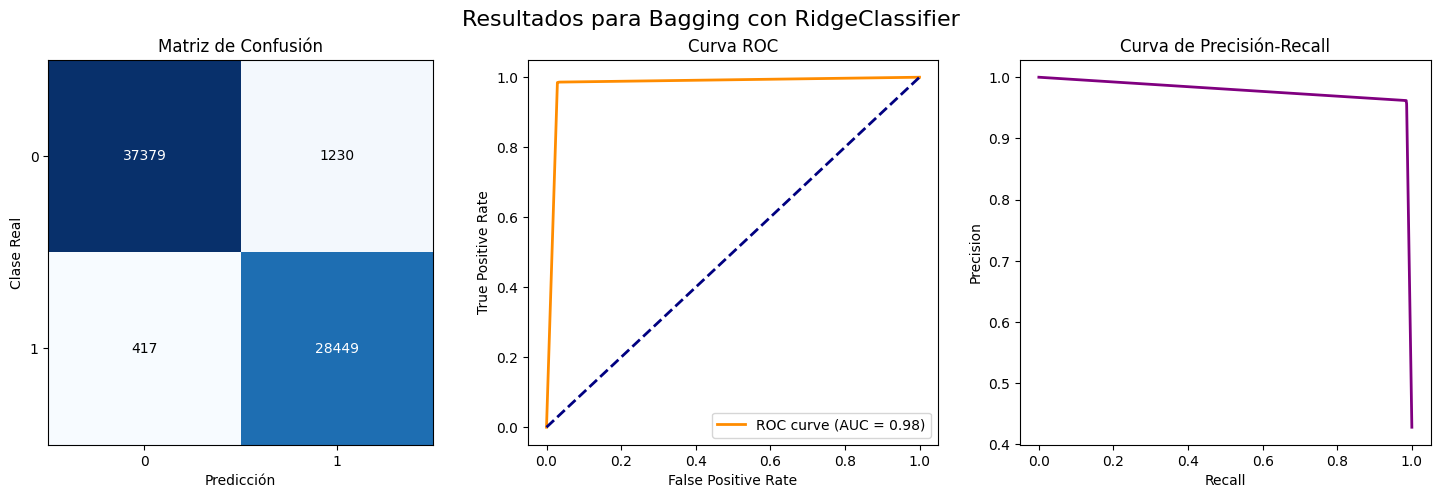


Resultados para la variable objetivo 'es_LDGincubadora' usando Blending con RidgeClassifier Ajustado:


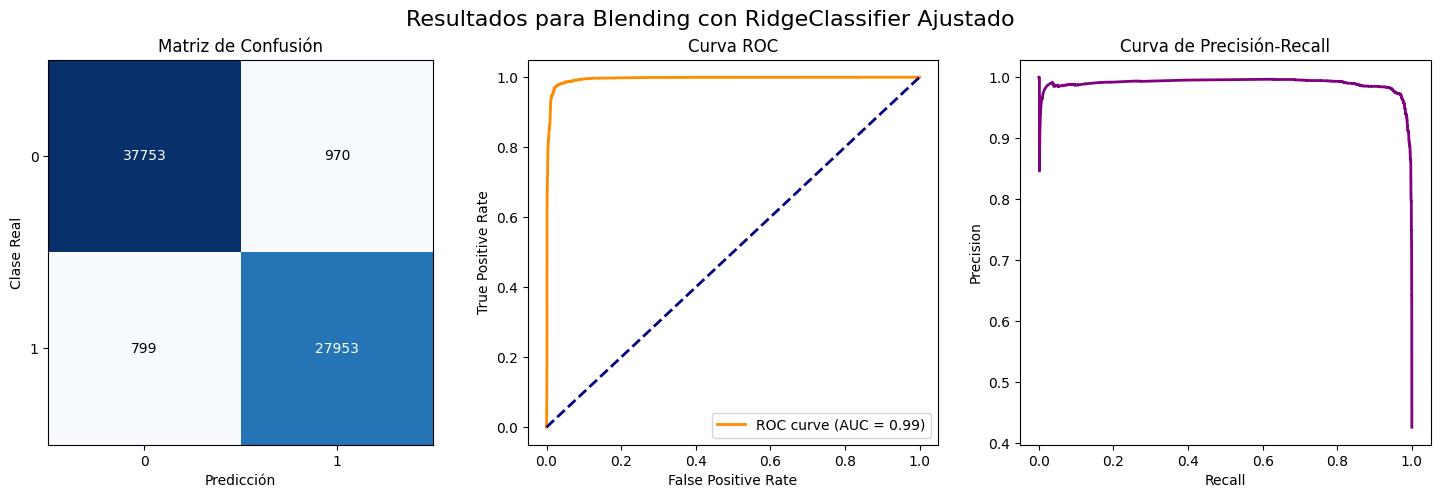

In [57]:
# Configuración de las variables objetivo y modelos
objective_variables = {
    'es_HistoriaExito': 'Blending con RidgeClassifier',
    'es_Voluntariado': 'Bagging con RidgeClassifier',
    'es_LDGincubadora': 'Blending con RidgeClassifier Ajustado'
}

# Filtrar datos
X = df_unidoLDG_encoded.drop(columns=objective_variables.keys())
y_dict = {var: df_unidoLDG_encoded[var] for var in objective_variables.keys()}

# Función para graficar subplots con Matriz de Confusión, Curva ROC y Curva de Precisión-Recall
def plot_metrics(y_test, y_pred, y_scores, model_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Resultados para {model_name}', fontsize=16)

    # Matriz de Confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    axes[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    axes[0].set_title("Matriz de Confusión")
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Clase Real')
    tick_marks = np.arange(len(set(y_test)))
    axes[0].set_xticks(tick_marks)
    axes[0].set_yticks(tick_marks)

    # Agregar valores numéricos en cada celda de la matriz de confusión
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            axes[0].text(j, i, format(conf_matrix[i, j], 'd'), ha="center", va="center",
                         color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

    # Curva ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_title("Curva ROC")
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend(loc="lower right")

    # Curva de Precisión-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    axes[2].plot(recall, precision, lw=2, color='purple')
    axes[2].set_title("Curva de Precisión-Recall")
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')

    plt.show()

# Procesar cada variable objetivo con su modelo final
for objective_variable, model_name in objective_variables.items():
    print(f"\nResultados para la variable objetivo '{objective_variable}' usando {model_name}:")

    # División de los datos en conjunto de entrenamiento y prueba
    y = y_dict[objective_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_name == 'Blending con RidgeClassifier':
        # Modelo Blending con RidgeClassifier antes del ajuste fino
        base_model = RidgeClassifier()
        X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_train, y_train, test_size=0.5, random_state=42, shuffle=False)

        # Ajuste el tamaño de valid_preds según el tamaño de X_valid_base
        valid_preds = np.zeros((X_valid_base.shape[0], 1))

        # Entrenar modelo base y obtener predicciones para blending
        cloned_model = clone(base_model)
        cloned_model.fit(X_train_base, y_train_base)
        valid_preds[:, 0] = cloned_model.predict(X_valid_base)

        # Entrenar meta-modelo
        meta_model = LogisticRegression()
        meta_model.fit(valid_preds, y_valid_base)

        # Obtener predicciones y puntajes
        test_preds = cloned_model.predict(X_test)
        y_scores = cloned_model.decision_function(X_test)

    elif model_name == 'Bagging con RidgeClassifier':
        # Modelo Bagging con RidgeClassifier después del ajuste fino para es_Voluntariado
        base_model = RidgeClassifier(alpha=10.0)
        bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)
        bagging_model.fit(X_train, y_train)

        # Obtener predicciones y puntajes
        test_preds = bagging_model.predict(X_test)
        y_scores = bagging_model.predict_proba(X_test)[:, 1] if hasattr(bagging_model, "predict_proba") else test_preds

    elif model_name == 'Blending con RidgeClassifier Ajustado':
        # Modelo Blending ajustado con RidgeClassifier para es_LDGincubadora
        base_model = RidgeClassifier(alpha=1.0, tol=0.001)
        X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_train, y_train, test_size=0.5, random_state=42, shuffle=False)

        # Ajuste el tamaño de valid_preds según el tamaño de X_valid_base
        valid_preds = np.zeros((X_valid_base.shape[0], 1))

        # Entrenar modelo base y obtener predicciones para blending
        cloned_model = clone(base_model)
        cloned_model.fit(X_train_base, y_train_base)
        valid_preds[:, 0] = cloned_model.predict(X_valid_base)

        # Entrenar meta-modelo
        meta_model = LogisticRegression()
        meta_model.fit(valid_preds, y_valid_base)

        # Obtener predicciones y puntajes
        test_preds = cloned_model.predict(X_test)
        y_scores = cloned_model.decision_function(X_test)

    # Graficar todos los resultados
    plot_metrics(y_test, test_preds, y_scores, model_name)

####Resultados obtenidos para la variable objetivo es_HistoriaExito utilizando el modelo de Blending con RidgeClassifier

* **Matriz de Confusión:** El modelo es bastante eficaz en identificar correctamente los casos positivos y negativos, minimizando los errores de clasificación. Esta distribución refleja un modelo bien ajustado para esta variable.

* **Curva ROC y AUC:** La curva ROC tiene una trayectoria casi perfecta, acercándose al valor de AUC de 1.0. Esto indica una capacidad sobresaliente del modelo para discriminar entre clases, siendo muy raro que el modelo confunda una clase con otra.

* **Curva de Precisión-Recall:** La curva de Precisión-Recall muestra una excelente relación entre la precisión y el recall, especialmente para los valores altos de recall.

####Resultados obtenidos para el modelo Bagging con RidgeClassifier aplicado a la variable objetivo "es_Voluntariado"

* **Matriz de Confusión:** La matriz de confusión muestra un excelente desempeño del modelo. La mayoría de las predicciones son correctas, con un número alto de verdaderos positivos (28,449) y verdaderos negativos (37,379). Sin embargo, también identificamos 1,230 falsos positivos y 417 falsos negativos. Estos errores de clasificación son mínimos en comparación con el volumen total de predicciones, lo que indica que el modelo es eficaz en su tarea de clasificación.

* **Curva ROC y AUC:** Con un AUC de 0.98, vemos que el modelo tiene un excelente balance entre sensibilidad y especificidad. La cercanía de la curva ROC al eje superior izquierdo indica que el modelo tiene una baja tasa de falsos positivos y una alta tasa de verdaderos positivos.

* **Curva de Precisión-Recall:** La curva de Precisión-Recall también confirma el alto rendimiento del modelo, manteniendo una alta precisión incluso en diferentes niveles de "Recall".

####Resultados del modelo Blending con RidgeClassifier Ajustado en la variable objetivo 'es_LDGincubadora'

* **Matriz de Confusión:** El modelo identificó correctamente la clase 0 en 37,753 casos y la clase 1 en 27,953 casos. Los errores son relativamente bajos: 970 falsos positivos y 799 falsos negativos. Esto indica que el modelo es robusto en la identificación de ambas clases, aunque tiene una ligera tendencia a predecir falsos positivos más que falsos negativos.

* **Curva ROC y AUC:** La curva ROC nos muestra un área bajo la curva (AUC) de 0.99, lo cual es excelente y refleja la capacidad del modelo para distinguir entre las clases 0 y 1.

* **Curva de Precisión-Recall:** La curva de precisión-recall muestra una precisión y una recuperación elevadas, cercanas al valor 1 en la mayoría de los umbrales de decisión.